In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [68]:
# Files to Load 
joined_csv = "./clean_output/joined2.csv"
fips_csv = "./resources/florida_fips.csv"
reg_yr_csv = "./clean_output/county_by_year_transv.csv"

In [69]:
# Read the data into Pandas DataFrames 
joined_df = pd.read_csv(joined_csv)
fips_df = pd.read_csv(fips_csv)
yr_reg_df = pd.read_csv(reg_yr_csv, index_col='date',parse_dates=True)
joined_df


,county,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,county2,2017,2018,2019,2020,2021,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations
0,Alachua,766,699,2454,2774,Alachua,12.0,5.0,5.0,7.0,12.0,17.0,22.0,29.0,41.0
1,Baker,5,12,41,42,Baker,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,Bay,300,237,876,972,Bay,8.0,0.0,1.0,4.0,3.0,8.0,9.0,13.0,16.0
3,Bradford,22,9,35,39,Bradford,2.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0
4,Brevard,1881,1657,6088,6843,Brevard,26.0,5.0,5.0,16.0,17.0,31.0,36.0,52.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Volusia,1079,903,3371,3796,Volusia,22.0,4.0,8.0,14.0,9.0,26.0,34.0,48.0,57.0
64,Wakulla,25,21,76,90,Wakulla,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0
65,Walton,211,171,649,772,Walton,7.0,1.0,1.0,4.0,1.0,8.0,9.0,13.0,14.0
66,Washington,13,10,25,30,Washington,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [70]:
joined_df = joined_df.drop(['county2','2017', '2018','2019','2020','2021'],axis=1)
joined_df = joined_df.drop(67)
joined_df

,county,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations
0,Alachua,766,699,2454,2774,17.0,22.0,29.0,41.0
1,Baker,5,12,41,42,0.0,1.0,1.0,1.0
2,Bay,300,237,876,972,8.0,9.0,13.0,16.0
3,Bradford,22,9,35,39,2.0,2.0,2.0,2.0
4,Brevard,1881,1657,6088,6843,31.0,36.0,52.0,69.0
...,...,...,...,...,...,...,...,...,...
62,Lafayette,1801,1778,6221,7489,NaN,NaN,NaN,NaN
63,Volusia,1079,903,3371,3796,26.0,34.0,48.0,57.0
64,Wakulla,25,21,76,90,0.0,0.0,0.0,4.0
65,Walton,211,171,649,772,8.0,9.0,13.0,14.0


In [71]:
#Shape of dataset
joined_df.shape

(67, 9)

In [72]:
# Info on dataset
null_data_joined = joined_df[joined_df.isna().any(axis=1)]
null_data_joined.to_csv('./clean_output/no_reg_counties.csv')
null_data_joined

,county,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations
6,Calhoun,5,5,11,14,NaN,NaN,NaN,NaN
14,Dixie,2,3,8,7,NaN,NaN,NaN,NaN
19,Gadsden,25,22,78,80,NaN,NaN,NaN,NaN
20,Gilchrist,10,13,39,38,NaN,NaN,NaN,NaN
21,Glades,5,4,21,24,NaN,NaN,NaN,NaN
24,Hardee,6,4,30,29,NaN,NaN,NaN,NaN
29,Holmes,8,6,10,10,NaN,NaN,NaN,NaN
36,Levy,23,24,82,106,NaN,NaN,NaN,NaN
37,Liberty,7,4,12,13,NaN,NaN,NaN,NaN
38,Madison,4,2,22,29,NaN,NaN,NaN,NaN


In [73]:
# Describe our dataset
joined_df.sort_values("2021_Fl_reg",ascending=False).head(45)

,county,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations
12,Dade,9559,7936,29977,34827,162.0,223.0,312.0,435.0
5,Broward,7942,6542,23689,26767,91.0,123.0,171.0,243.0
48,Palm Beach,7943,6131,22458,25106,83.0,106.0,144.0,214.0
46,Orange,5245,4830,17617,19980,133.0,165.0,226.0,331.0
28,Hillsborough,4420,3849,14000,16110,77.0,104.0,135.0,186.0
50,Pinellas,3508,3014,10590,11760,62.0,92.0,128.0,196.0
62,Lafayette,1801,1778,6221,7489,NaN,NaN,NaN,NaN
15,Duval,2059,1733,6101,6878,52.0,83.0,123.0,159.0
4,Brevard,1881,1657,6088,6843,31.0,36.0,52.0,69.0
34,Lee,1764,1463,5628,6683,26.0,32.0,39.0,55.0


In [74]:
# joined_df['2018'] = (['2018_Total_Stations'].astype(float) / joined_df['2018_Fl_reg'].astype(float))
joined_df['2018'] = (joined_df['2018_Total_Stations'] / joined_df['2018_Fl_reg'])*100
joined_df['2019'] = (joined_df['2019_Total_Stations'] / joined_df['2019_Fl_reg'])*100
joined_df['2020'] = (joined_df['2020_Total_Stations'] / joined_df['2020_Fl_reg'])*100
joined_df['2021'] = (joined_df['2021_Total_Stations'] / joined_df['2021_Fl_reg'])*100

joined_df['2019_%increase'] = ((joined_df['2019_Fl_reg'] - joined_df['2018_Fl_reg']) / joined_df['2018_Fl_reg'])*100
joined_df['2020_%increase'] = ((joined_df['2020_Fl_reg'] - joined_df['2019_Fl_reg']) / joined_df['2019_Fl_reg'])*100
joined_df['2021_%increase'] = ((joined_df['2021_Fl_reg'] - joined_df['2020_Fl_reg']) / joined_df['2020_Fl_reg'])*100

In [75]:
joined_df.sort_values("2021_Fl_reg",ascending=False).head(45)

,county,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations,2018,2019,2020,2021,2019_%increase,2020_%increase,2021_%increase
12,Dade,9559,7936,29977,34827,162.0,223.0,312.0,435.0,1.694738,2.809980,1.040798,1.249031,-16.978763,277.734375,16.179071
5,Broward,7942,6542,23689,26767,91.0,123.0,171.0,243.0,1.145807,1.880159,0.721854,0.907834,-17.627802,262.106389,12.993372
48,Palm Beach,7943,6131,22458,25106,83.0,106.0,144.0,214.0,1.044945,1.728919,0.641197,0.852386,-22.812539,266.302398,11.790899
46,Orange,5245,4830,17617,19980,133.0,165.0,226.0,331.0,2.535748,3.416149,1.282852,1.656657,-7.912297,264.741201,13.413180
28,Hillsborough,4420,3849,14000,16110,77.0,104.0,135.0,186.0,1.742081,2.702001,0.964286,1.154562,-12.918552,263.730839,15.071429
50,Pinellas,3508,3014,10590,11760,62.0,92.0,128.0,196.0,1.767389,3.052422,1.208687,1.666667,-14.082098,251.360319,11.048159
62,Lafayette,1801,1778,6221,7489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.277068,249.887514,20.382575
15,Duval,2059,1733,6101,6878,52.0,83.0,123.0,159.0,2.525498,4.789383,2.016063,2.311719,-15.832929,252.048471,12.735617
4,Brevard,1881,1657,6088,6843,31.0,36.0,52.0,69.0,1.648060,2.172601,0.854139,1.008330,-11.908559,267.410984,12.401445
34,Lee,1764,1463,5628,6683,26.0,32.0,39.0,55.0,1.473923,2.187286,0.692964,0.822984,-17.063492,284.688995,18.745558


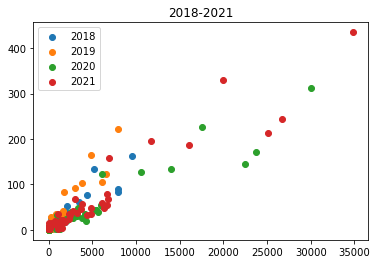

In [76]:
import matplotlib.pylab as plt
mydata = joined_df[["2018_Fl_reg", "2018_Total_Stations"]]#.dropna(how="any")
vals = mydata.values
plt.scatter(vals[:, 0], vals[:, 1],label=f'2018')
mydata2 = joined_df[["2019_Fl_reg", "2019_Total_Stations"]]#.dropna(how="any")
vals2 = mydata2.values
plt.scatter(vals2[:, 0], vals2[:, 1],label=f'2019')
mydata3 = joined_df[["2020_Fl_reg", "2020_Total_Stations"]]#.dropna(how="any")
vals3 = mydata3.values
plt.scatter(vals3[:, 0], vals3[:, 1],label=f'2020')
mydata4 = joined_df[["2021_Fl_reg", "2021_Total_Stations"]]#.dropna(how="any")
vals4 = mydata4.values
plt.scatter(vals4[:, 0], vals4[:, 1],label=f'2021')

# Plot
plt.title('2018-2021')
plt.legend()
plt.show()

## shows the comparison of the stations per registration of each year

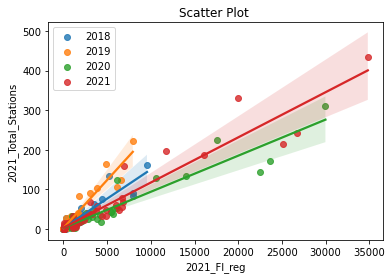

In [77]:
sns.regplot(x='2018_Fl_reg', y='2018_Total_Stations',label=f'2018', data=joined_df) 
sns.regplot(x='2019_Fl_reg', y='2019_Total_Stations',label=f'2019', data=joined_df)
sns.regplot(x='2020_Fl_reg', y='2020_Total_Stations',label=f'2020', data=joined_df)
sns.regplot(x='2021_Fl_reg', y='2021_Total_Stations',label=f'2021', data=joined_df)
plt.legend()
plt.title("Scatter Plot ");

In [78]:
yr_reg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2018-01-01 to 2021-01-01
Data columns (total 67 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Alachua       4 non-null      int64
 1   Baker         4 non-null      int64
 2   Bay           4 non-null      int64
 3   Bradford      4 non-null      int64
 4   Brevard       4 non-null      int64
 5   Broward       4 non-null      int64
 6   Calhoun       4 non-null      int64
 7   Charlotte     4 non-null      int64
 8   Citrus        4 non-null      int64
 9   Clay          4 non-null      int64
 10  Collier       4 non-null      int64
 11  Columbia      4 non-null      int64
 12  Dade          4 non-null      int64
 13  Desoto        4 non-null      int64
 14  Dixie         4 non-null      int64
 15  Duval         4 non-null      int64
 16  Escambia      4 non-null      int64
 17  Flagler       4 non-null      int64
 18  Franklin      4 non-null      int64
 19  Gadsden     

In [79]:
# yr_reg_df = yr_reg_df.set_index('date') ## no longer needed, date was set as index at import

## Make sure all the imports needed for the ML model are present

In [80]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
# evaluate an ARIMA model using a walk-forward validation
from sklearn.metrics import mean_squared_error
from math import sqrt

## Testing the data, checking the code

In [81]:
a=1
b=0
test_df = yr_reg_df.iloc[1:,b:a]
series = test_df
series


,Alachua
date,
2019-01-01,699
2020-01-01,2454
2021-01-01,2774


## compare the aic results for ARIMA's best model

In [82]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [83]:
stepwise_fit = auto_arima(series,trace = True,supress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=53.408, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=180.398, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=56.625, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.216 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    3
Model:                        SARIMAX   Log Likelihood                 -24.704
Date:                Thu, 09 Jun 2022   AIC                             53.408
Time:                        11:44:19   BIC                             51.606
Sample:                             0   HQIC                            49.785
                                  - 3                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1975.6667   1260.125      1.568      0.117    -494.132    4445.466
sigma2       8.32e+05   3.25e+06      0.256      0.798   -5.54e+06     7.2e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.80   Prob(JB):                         0.78
Heteroskedasticity (H):                nan   Skew:                            -0.64
Prob(H) (two-sided):                   nan   Kurtosis:                         1.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

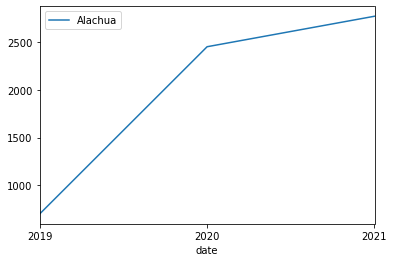

In [84]:
series.plot()
plt.show()

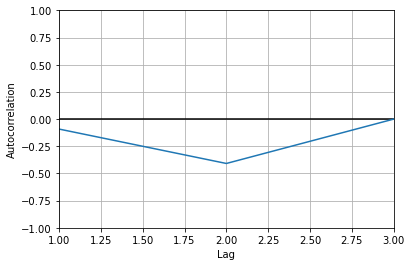

In [85]:
autocorrelation_plot(series)
plt.show()

## make sure the arima order is same as best fit model

                               SARIMAX Results                                
Dep. Variable:                Alachua   No. Observations:                    3
Model:                          ARIMA   Log Likelihood                 -24.704
Date:                Thu, 09 Jun 2022   AIC                             53.409
Time:                        11:44:20   BIC                             51.606
Sample:                    01-01-2019   HQIC                            49.785
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1975.6667   1270.680      1.555      0.120    -514.821    4466.154
sigma2      8.393e+05   3.31e+06      0.254      0.800   -5.64e+06    7.32e+06
Ljung-Box (L1) (Q):                   0.06   Jarque-

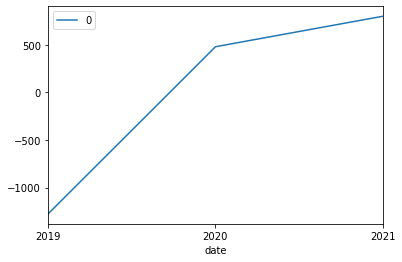

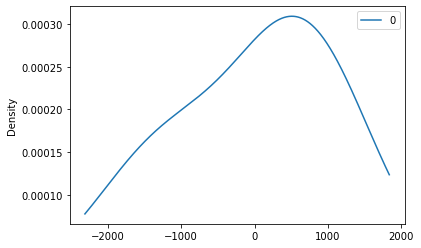

                  0
count  3.000000e+00
mean  -3.031649e-13
std    1.117143e+03
min   -1.276667e+03
25%   -3.991667e+02
50%    4.783333e+02
75%    6.383333e+02
max    7.983333e+02


In [86]:
# fit model
model = ARIMA(series, order=(0,0,0)) ###<-- set to match best fit model
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())


## Loop thru all the columns to show predictions

In [96]:
# a=1
# b=0
# for column in yr_reg_df:
#     test_df = yr_reg_df.iloc[1:,b:a]
#     a= a+1
#     b= b+1
#     series = test_df
#     # split into train and test sets
#     X1 = series.values
#     train, test = X1, X1
#     history = [x for x in train]
#     predictions = list()
#     # walk-forward validation
#     for t in range(len(test)):
#         model = ARIMA(history, order=(0,0,0))
#         model_fit = model.fit()
#         output = model_fit.forecast()
#         yhat = output[0]
#         predictions.append(yhat)
#         obs = test[t]
#         history.append(obs)
#         print('predicted=%f, expected=%f' % (yhat, obs))
#     # evaluate forecasts
#     rmse = sqrt(mean_squared_error(test, predictions))
#     print('Test RMSE: %.3f' % rmse)
#     # plot forecasts against actual outcomes
#     plt.plot(test)
#     plt.plot(predictions, color='red')
#     cty = list(series.columns.values)
#     plt.title(cty)
#     plt.show()

    

    


In [97]:
df = pd.DataFrame()

2022-01-01    1975.666667
Freq: AS-JAN, dtype: float64
Test RMSE: 912.143


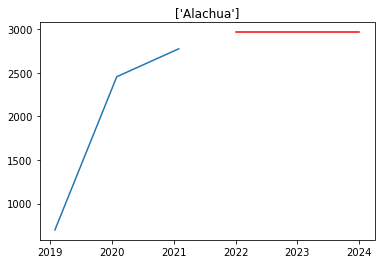

2022-01-01    31.666662
Freq: AS-JAN, dtype: float64
Test RMSE: 13.912


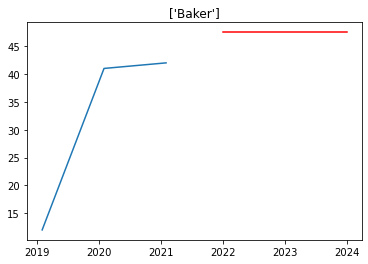

2022-01-01    694.999998
Freq: AS-JAN, dtype: float64
Test RMSE: 326.218


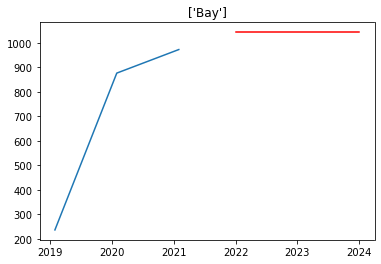

2022-01-01    27.666661
Freq: AS-JAN, dtype: float64
Test RMSE: 13.300


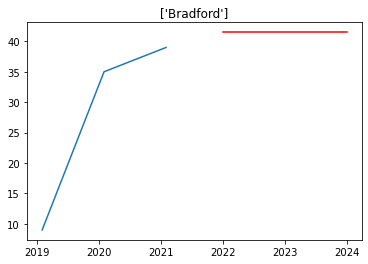

2022-01-01    4862.666393
Freq: AS-JAN, dtype: float64
Test RMSE: 2287.609


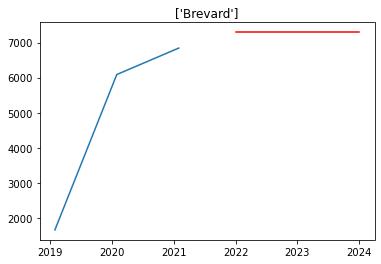

2022-01-01    18999.333333
Freq: AS-JAN, dtype: float64
Test RMSE: 8897.842


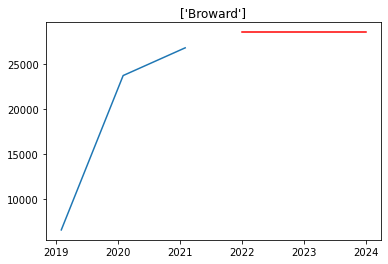

2022-01-01    9.999995
Freq: AS-JAN, dtype: float64
Test RMSE: 3.742


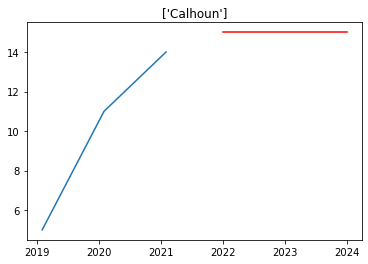

2022-01-01    1055.0
Freq: AS-JAN, dtype: float64
Test RMSE: 495.206


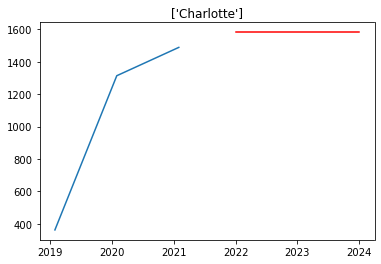

2022-01-01    515.999995
Freq: AS-JAN, dtype: float64
Test RMSE: 255.227


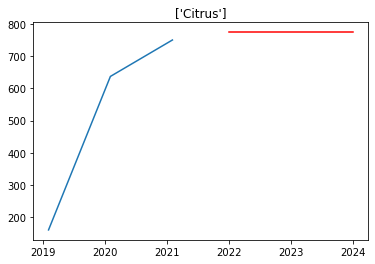

2022-01-01    843.999995
Freq: AS-JAN, dtype: float64
Test RMSE: 390.580


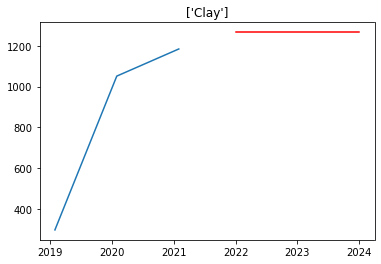

2022-01-01    4415.0
Freq: AS-JAN, dtype: float64
Test RMSE: 2168.099


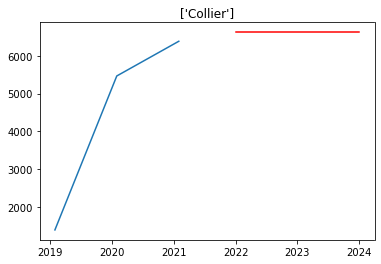

2022-01-01    120.999995
Freq: AS-JAN, dtype: float64
Test RMSE: 58.657


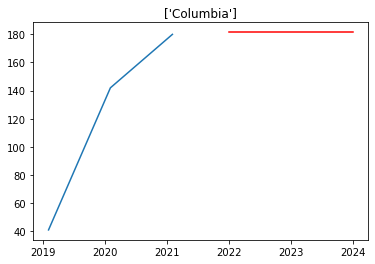

2022-01-01    24246.666667
Freq: AS-JAN, dtype: float64
Test RMSE: 11702.108


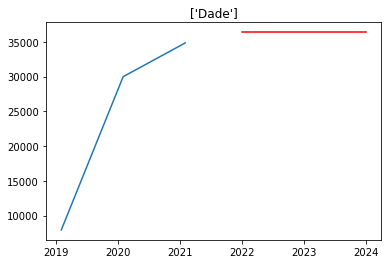

2022-01-01    58.333329
Freq: AS-JAN, dtype: float64
Test RMSE: 26.234


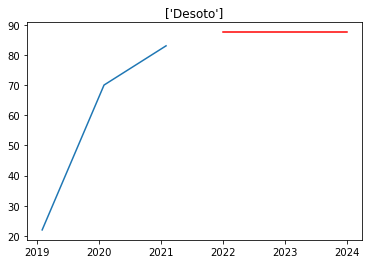

2022-01-01    5.999995
Freq: AS-JAN, dtype: float64
Test RMSE: 2.160


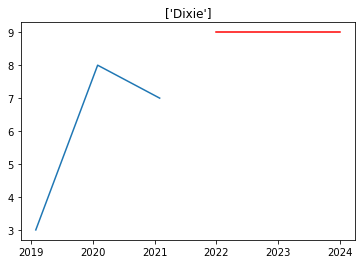

2022-01-01    4904.0
Freq: AS-JAN, dtype: float64
Test RMSE: 2264.562


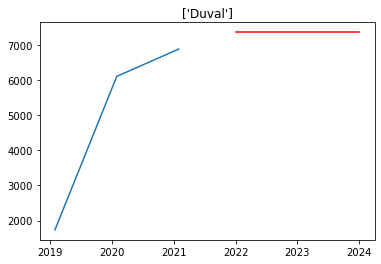

2022-01-01    1156.333333
Freq: AS-JAN, dtype: float64
Test RMSE: 547.650


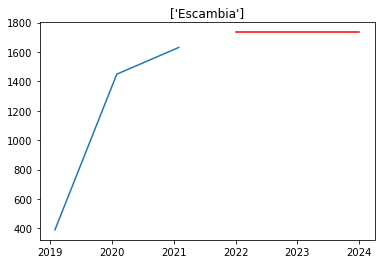

2022-01-01    772.999994
Freq: AS-JAN, dtype: float64
Test RMSE: 367.606


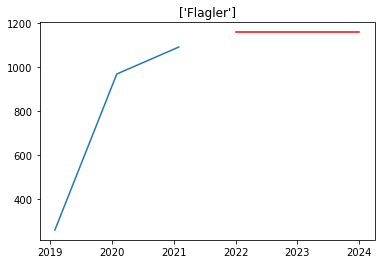

2022-01-01    46.666662
Freq: AS-JAN, dtype: float64
Test RMSE: 20.336


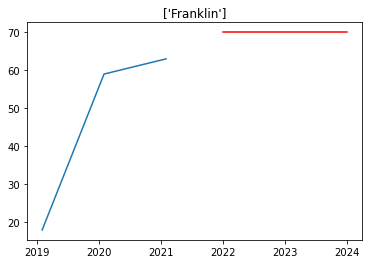

2022-01-01    59.999996
Freq: AS-JAN, dtype: float64
Test RMSE: 26.882


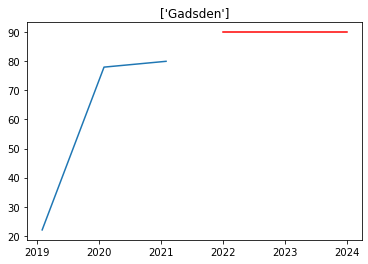

2022-01-01    29.999995
Freq: AS-JAN, dtype: float64
Test RMSE: 12.028


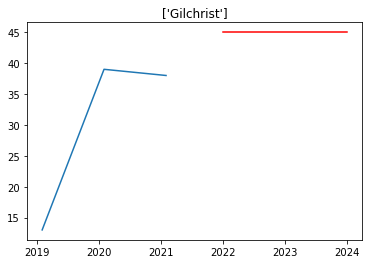

2022-01-01    16.333328
Freq: AS-JAN, dtype: float64
Test RMSE: 8.807


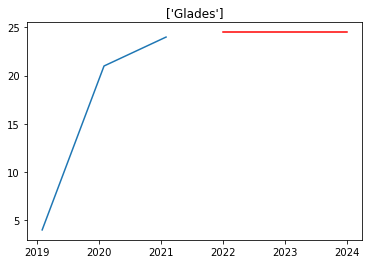

2022-01-01    26.999995
Freq: AS-JAN, dtype: float64
Test RMSE: 14.166


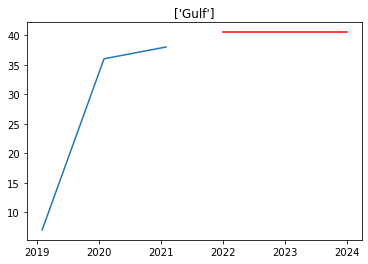

2022-01-01    6.999995
Freq: AS-JAN, dtype: float64
Test RMSE: 3.559


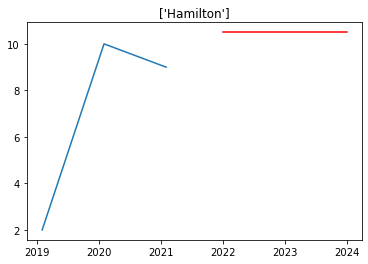

2022-01-01    20.999995
Freq: AS-JAN, dtype: float64
Test RMSE: 12.028


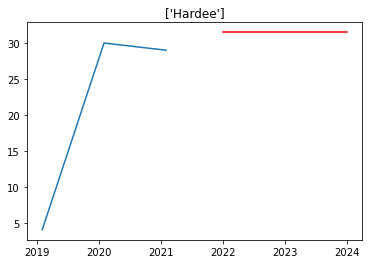

2022-01-01    82.999995
Freq: AS-JAN, dtype: float64
Test RMSE: 38.609


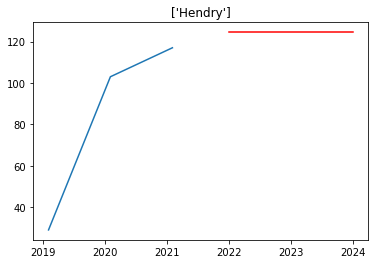

2022-01-01    718.666667
Freq: AS-JAN, dtype: float64
Test RMSE: 351.691


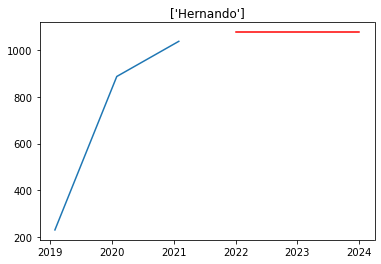

2022-01-01    285.333329
Freq: AS-JAN, dtype: float64
Test RMSE: 125.784


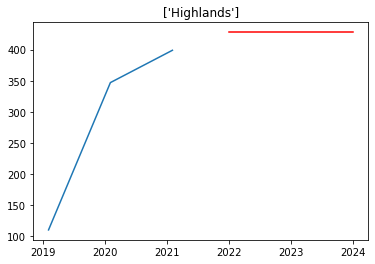

2022-01-01    11319.662601
Freq: AS-JAN, dtype: float64
Test RMSE: 5352.331


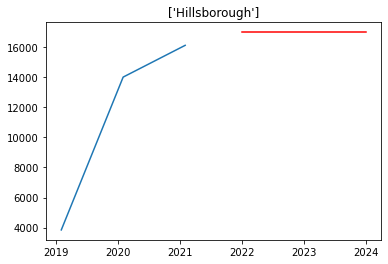

2022-01-01    8.666662
Freq: AS-JAN, dtype: float64
Test RMSE: 1.886


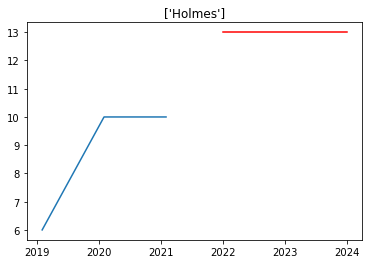

2022-01-01    1030.666667
Freq: AS-JAN, dtype: float64
Test RMSE: 499.086


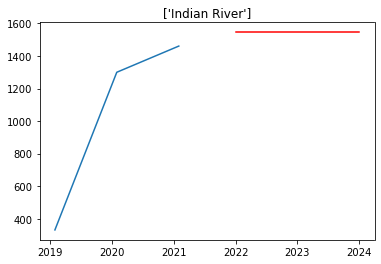

2022-01-01    34.999995
Freq: AS-JAN, dtype: float64
Test RMSE: 14.236


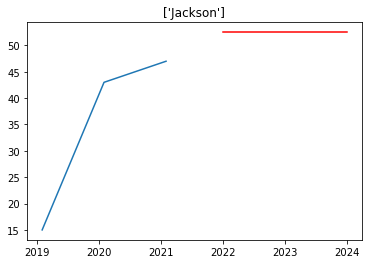

2022-01-01    46.999995
Freq: AS-JAN, dtype: float64
Test RMSE: 18.385


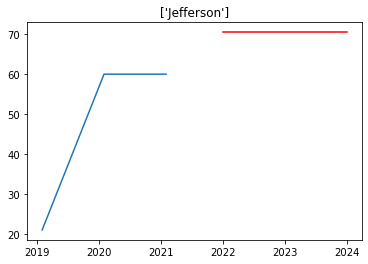

2022-01-01    2285.666803
Freq: AS-JAN, dtype: float64
Test RMSE: 1051.648


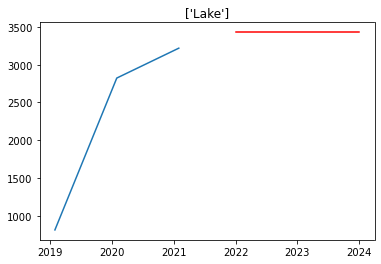

2022-01-01    4591.332053
Freq: AS-JAN, dtype: float64
Test RMSE: 2253.606


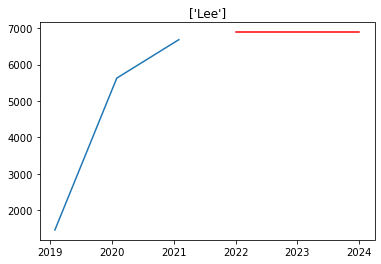

2022-01-01    1693.666581
Freq: AS-JAN, dtype: float64
Test RMSE: 801.373


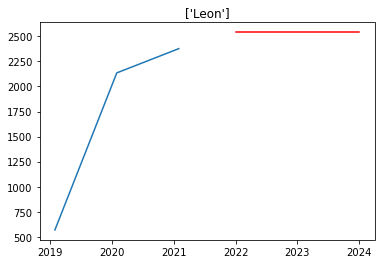

2022-01-01    70.666662
Freq: AS-JAN, dtype: float64
Test RMSE: 34.422


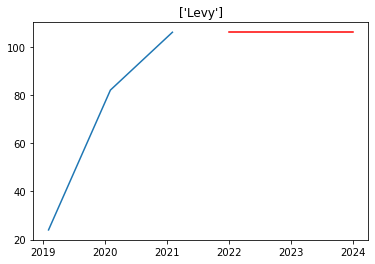

2022-01-01    9.666662
Freq: AS-JAN, dtype: float64
Test RMSE: 4.028


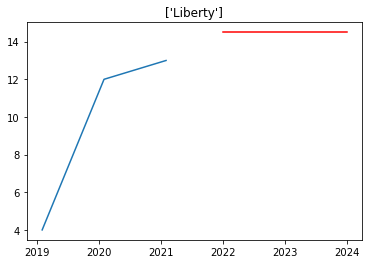

2022-01-01    17.666662
Freq: AS-JAN, dtype: float64
Test RMSE: 11.441


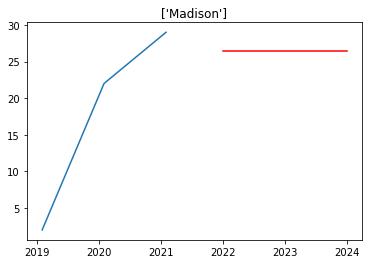

2022-01-01    3370.999896
Freq: AS-JAN, dtype: float64
Test RMSE: 1622.212


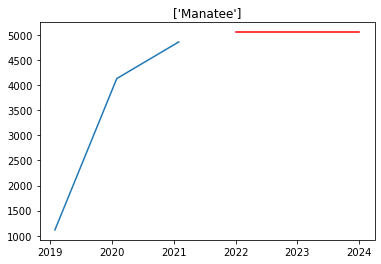

2022-01-01    1343.333287
Freq: AS-JAN, dtype: float64
Test RMSE: 631.629


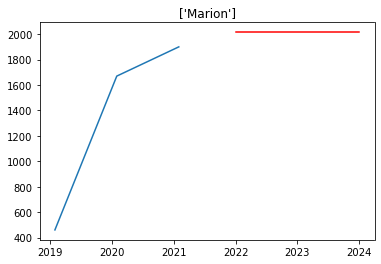

2022-01-01    1665.333083
Freq: AS-JAN, dtype: float64
Test RMSE: 783.947


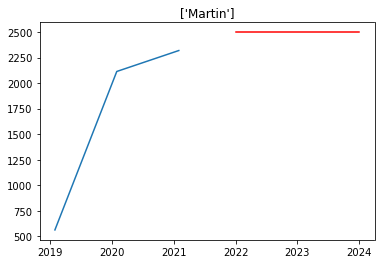

2022-01-01    761.333333
Freq: AS-JAN, dtype: float64
Test RMSE: 339.700


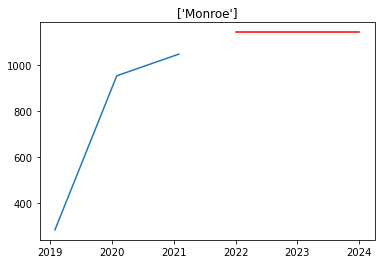

2022-01-01    465.66662
Freq: AS-JAN, dtype: float64
Test RMSE: 216.495


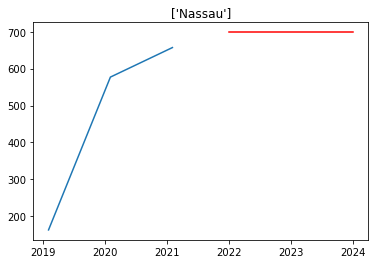

2022-01-01    1013.33332
Freq: AS-JAN, dtype: float64
Test RMSE: 503.220


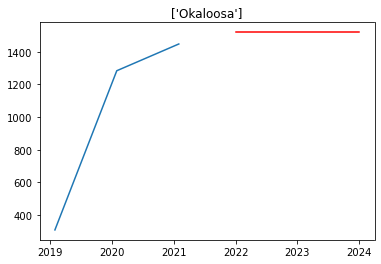

2022-01-01    60.666663
Freq: AS-JAN, dtype: float64
Test RMSE: 28.546


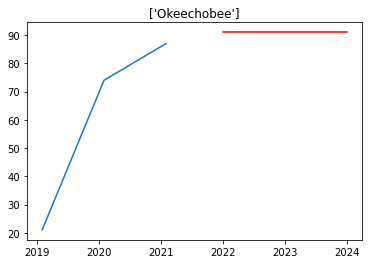

2022-01-01    14142.34331
Freq: AS-JAN, dtype: float64
Test RMSE: 6655.104


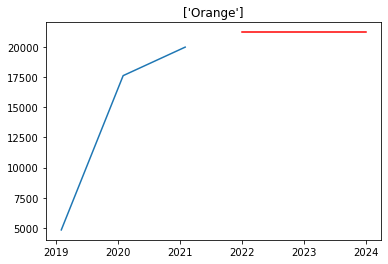

2022-01-01    2095.0
Freq: AS-JAN, dtype: float64
Test RMSE: 1046.331


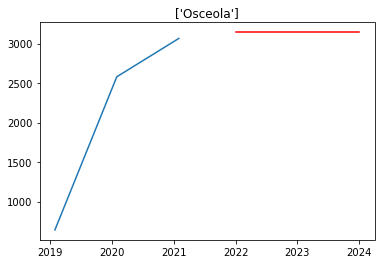

2022-01-01    17898.322734
Freq: AS-JAN, dtype: float64
Test RMSE: 8390.692


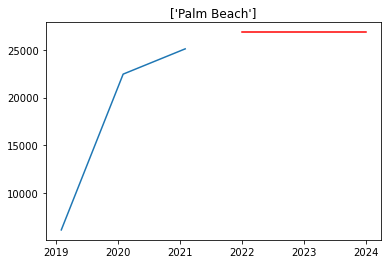

2022-01-01    3447.333333
Freq: AS-JAN, dtype: float64
Test RMSE: 1649.299


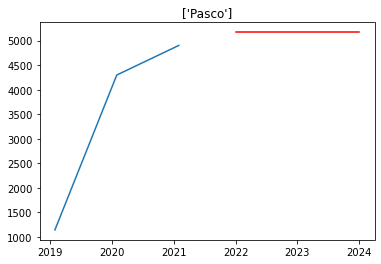

2022-01-01    8454.677144
Freq: AS-JAN, dtype: float64
Test RMSE: 3876.671


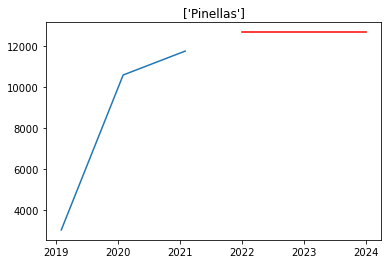

2022-01-01    2585.999854
Freq: AS-JAN, dtype: float64
Test RMSE: 1238.887


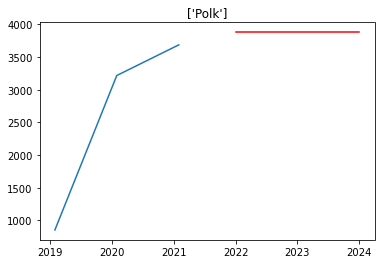

2022-01-01    122.999995
Freq: AS-JAN, dtype: float64
Test RMSE: 57.695


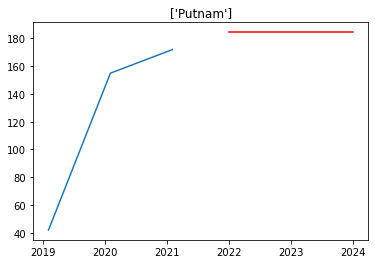

2022-01-01    796.333333
Freq: AS-JAN, dtype: float64
Test RMSE: 384.354


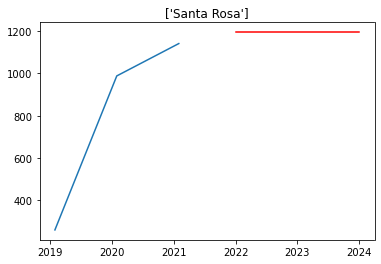

2022-01-01    4753.00113
Freq: AS-JAN, dtype: float64
Test RMSE: 2225.668


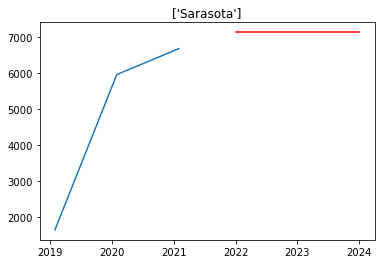

2022-01-01    4359.333799
Freq: AS-JAN, dtype: float64
Test RMSE: 1993.183


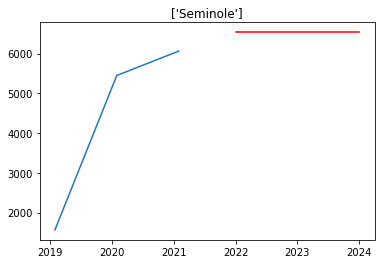

2022-01-01    3083.000105
Freq: AS-JAN, dtype: float64
Test RMSE: 1513.041


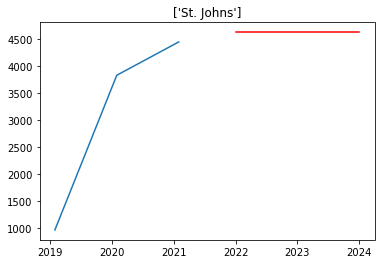

2022-01-01    1656.333333
Freq: AS-JAN, dtype: float64
Test RMSE: 814.315


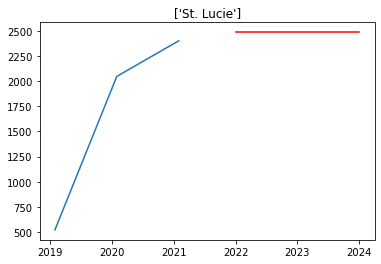

2022-01-01    688.666667
Freq: AS-JAN, dtype: float64
Test RMSE: 308.990


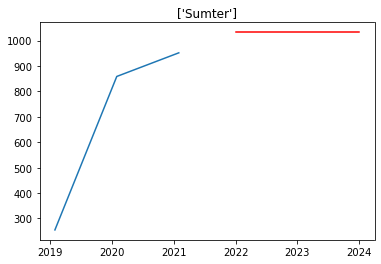

2022-01-01    44.333328
Freq: AS-JAN, dtype: float64
Test RMSE: 20.138


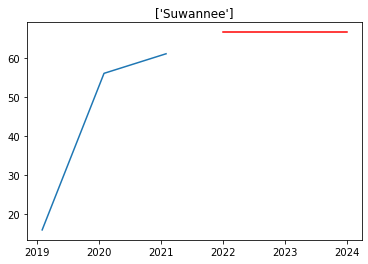

2022-01-01    14.666662
Freq: AS-JAN, dtype: float64
Test RMSE: 6.182


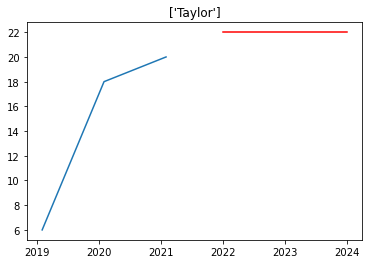

2022-01-01    9.999995
Freq: AS-JAN, dtype: float64
Test RMSE: 5.888


KeyboardInterrupt: 

In [98]:


# yr_reg_df.index = yr_reg_df.index.to_period('Y')
a=1
b=0
for column in yr_reg_df:
    train = yr_reg_df.iloc[1:,b:a]
    test = yr_reg_df.iloc[1:,b:a]
    test.index = pd.date_range(start='1/1/2019', periods=3, freq='12M')
    a= a+1
    b= b+1
#     series = test_df
    # split into train and test sets
#     X1 = series#.values
    history = [x for x in train]
    start = len(train)
    end = len(train)
    model = ARIMA(train, order=(0,0,0))
    model_fit = model.fit()
    predictions = model_fit.predict(start=start,end=end,type='levels')
    predicions = predictions*1.5
    predicions.to_csv('./clean_output/predictions.csv', mode='a', index=False, header=False)
    print(predictions)
    model2 = ARIMA(train, order=(0,0,0))
    model_fit2 = model2.fit()
    index_future_dates = pd.date_range(start='1/1/2019', periods=4, freq='12M')
    predictions = model_fit2.predict(start=len(test_df),end=len(test_df)+2,type = 'levels').rename('arima predictions')
#     predictions.index = series.index[start:end]
    # walk-forward validation
#     for t in range(len(test)):
#         model = ARIMA(history, order=(0,0,0))
#         model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     df = predictions.append(output)
#         obs = test[t]
#         history.append(obs)
#         print('predicted=%f, expected=%f' % (yhat, obs))
#     # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    # plot forecasts against actual outcomes
    plt.plot(test)
    plt.plot(predictions*1.5, color='red')
    cty = list(train.columns.values)
    plt.title(cty)
    plt.show()

    

    

In [ ]:
pred = pd.read_csv('./clean_output/predictions.csv', header=None)
pred = pred.rename(columns={0: "2022_Predictions"})
pred.head()

In [ ]:
result = pd.concat([joined_df, pred], axis=1)
result = result.merge(fips_df,how = 'left', on='county')
result.head()

In [ ]:
result.to_csv('./clean_output/final_results.csv', index=False, header=True)